In [1]:
from PIL import Image

from fdray import (
    Background,
    Box,
    Camera,
    Color,
    ColorMap,
    Declare,
    Include,
    LightSource,
    Object,
    Pigment,
    PigmentMap,
    Renderer,
    Scene,
)


In [2]:
def scene(*attrs) -> Scene:
    camera = Camera(30, 20, view_scale=2)
    box = Declare(Box((-1, -1, -1), (1, 1, 1)))
    return Scene(
        Include("colors.inc"),
        camera,
        LightSource(camera.location, "white"),
        Background("white", alpha=0.1),
        Object(box, *attrs),
    )


def render(*attrs) -> Image.Image:
    renderer = Renderer(width=300, height=300)
    array = renderer.render(scene(*attrs))
    return Image.fromarray(array)

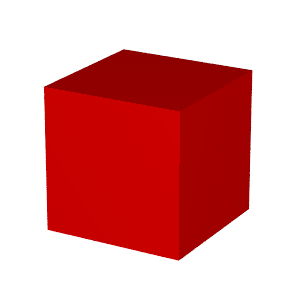

In [6]:
render(Color("red"))

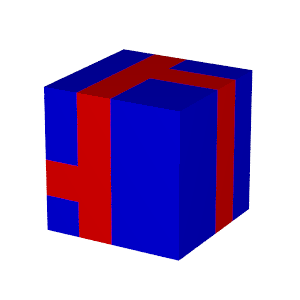

In [4]:
render(Pigment("brick", "Red", "Blue"))

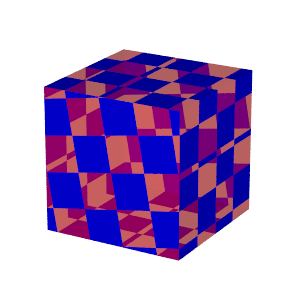

In [5]:
p = Pigment("checker", Color("red", 0.5), Color("blue")).rotate(10, 0, 0).scale(0.5)
render(p)

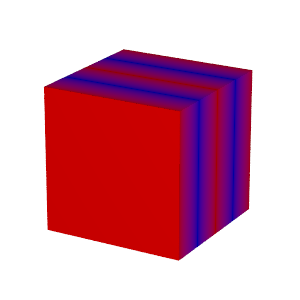

In [20]:
p = Pigment("gradient x", ColorMap((0, "red"), (0.5, "blue"), (1, "red")))
render(p)

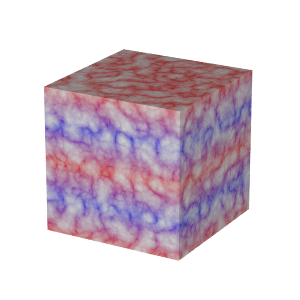

In [21]:
a = Pigment("granite", ColorMap((0, "red"), (0.9, "white")))
b = Pigment("granite", ColorMap((0, "blue"), (0.9, "white")))
p = Pigment("gradient z", PigmentMap((0, a), (0.5, b), (1, a)))
render(p)

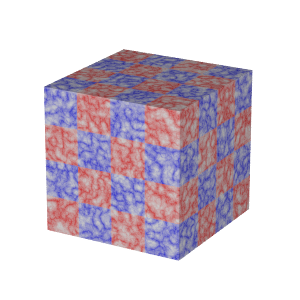

In [23]:
render(Pigment("checker", a, b).scale(0.5))